In [1]:
import numpy as np

# 4 NumPy Basics: Arrays and Vectorized Computation

In [2]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

Wow those look big, now multiply them by two.

In [3]:
 %timeit my_arr2 = my_arr * 2

368 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit my_list2 = [x * 2 for x in my_list]


50.4 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


DID YOU SEE HOW FAST THAT LIST WENT?! IT WAS LIKE ZOOOOOM. This is because NumPy is like 10 to 1000 times FASTER then pure Python, and they use significantly less memory.


# 4.1 The NumPy ndarray: A Multidimensional Array Object
One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and create a small array:



In [6]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

You can also do mathematical Operations with `data`

In [7]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [8]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a `shape`, a tuple indicating the size of each dimension, and a `dtype`, an object describing the data type of the array:

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

## Creating ndarrays
The easiest way to create an array is to use the `array` function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion:



In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1


array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since `data2` was a list of lists, the NumPy array `arr2` has two dimensions, with shape inferred from the data. We can confirm this by inspecting the `ndim` and `shape` attributes:



In [13]:
arr2.ndim

2

In [14]:
arr2.shape

(2, 4)

`numpy.array` tries to infer a good data type for the array that it creates. The data type is stored in a special `dtype` metadata object; for example, in the previous two examples we have:

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int64')

In addition to `numpy.array`, there are a number of other functions for creating new arrays. As examples, `numpy.zeros` and `numpy.ones` create arrays of 0s or 1s, respectively, with a given length or shape. `numpy.empty` creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:


In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2))

array([[[0.00000000e+000, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 8.75983079e+164]],

       [[5.20269907e-090, 9.76835939e+165],
        [8.26442131e-072, 6.52172024e-038],
        [3.99910963e+252, 1.46030983e-319]]])

- It’s not safe to assume that `numpy.empty` will return an array of all zeros. This function returns uninitialized memory and thus may contain nonzero "garbage" values. You should use this function only if you intend to populate the new array with data.



`numpy.arange` is an array-valued version of the built-in Python `range` function:



In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Data Types for ndarrays
The `data` type or `dtype` is a special object containing the information (or `metadata`, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [22]:
arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int32')

You can explicitly convert or cast an array from one data type to another using ndarray’s `astype` method:



In [25]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [26]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [27]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer data type, the decimal part will be truncated:



In [29]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [30]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use `astype`to convert them to numeric form:

In [32]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)


array([ 1.25, -9.6 , 42.  ])

- Be cautious when using the numpy.string_ type, as string data in NumPy is fixed size and may truncate input without warning. pandas has more intuitive out-of-the-box behavior on non-numeric data.

If casting were to fail for some reason (like a string that cannot be converted to `float64`), a `ValueError` will be raised. Before, I was a bit lazy and wrote `float` instead of `np.float64`; NumPy aliases the Python types to its own equivalent data types.

You can also use another array’s `dtype` attribute:

In [34]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a `dtype`:

In [36]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32


array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

- Calling `astype` always creates a new array (a copy of the data), even if the new data type is the same as the old data type.



## Arithmetic with NumPy Arrays
Arrays are important because they enable you to express batch operations on data without writing any `for` loops. NumPy users call this `vectorization`. Any arithmetic operations between equal-size arrays apply the operation element-wise:

In [37]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [38]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [39]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

Comparisons between arrays of the same size yield Boolean arrays:

In [44]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [45]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing
NumPy array indexing is a deep topic, as there are many ways you may want to select a subset of your data or individual elements. One-dimensional arrays are simple; on the surface they act similarly to Python lists:


In [46]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
arr[5]

5

In [48]:
arr[5:8]

array([5, 6, 7])

In [49]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

To give an example of this, I first create a slice of `arr`:

In [50]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, when I change values in `arr_slice`, the mutations are reflected in the original array arr:

In [51]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The "bare" slice `[:]` will assign to all values in an array:

In [54]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

- If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, `arr[5:8].copy()`. As you will see, pandas works this way, too.



With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [56]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent:



In [58]:
arr2d[0][2]

3

In [59]:
arr2d[0, 2]

3

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions. So in the 2 × 2 × 3 array `arr3d`:



In [60]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

`arr3d[0]` is a 2 × 3 array:

In [61]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to `arr3d[0]`:



In [62]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [63]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, `arr3d[1, 0]` gives you all of the values whose indices start with `(1, 0)`, forming a one-dimensional array:



In [64]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [65]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [66]:
x[0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been selected, the returned arrays are views.

- This multidimensional indexing syntax for NumPy arrays will not work with regular Python objects, such as lists of lists.


## Indexing with slices
Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:


In [67]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [68]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [69]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [70]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression `arr2d[:2]` as "select the first two rows of `arr2d`."


In [71]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.

For example, I can select the second row but only the first two columns, like so:

Here, while `arr2d` is two-dimensional, `lower_dim_slice` is one-dimensional, and its shape is a tuple with one axis size:

In [74]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice.shape

(2,)

Similarly, I can select the third column but only the first two rows, like so:

In [75]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [76]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:


In [78]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## Boolean Indexing
Let’s consider an example where we have some data in an array and an array of names with duplicates:

In [79]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])

In [80]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [81]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

That's right, we can do vectorization on these too

In [82]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

This can also be passed when Indexing the Array. See how it takes those specific values out of the spots:

In [83]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

Now the Boolean Array must be the same length as the Array axis it's indexing. But you can mix and match Boolean Arrays with slices or Integers. (Even sequences of Integers):

In [89]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [87]:
data[names == "Bob", 1]

array([7, 0])

To select everything but `Bob` you can use `!=`or negate the condition with `~`

In [90]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [91]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [92]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In fact `~` is exceptionally useful when you want to invert a Boolean Array referenced by a variable

In [94]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Now it would be terrible if we couldn't combine multiple conditions like we can with Python. So we got that covered with `&` (and) and `|` (or)

In [95]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

Selecting data from an array by Boolean indexing and assigning the result to a new variable __always__ creates a copy of the data, even if the returned array is unchanged.

- The Python `and`/`or` __DO NOT WORK__ with Boolean arrays, use `&` / `|`

Setting values with Boolean arrays works by substituting the value or values on the righthand side into the locations where the Boolean array's values are `True` To set all negative values in `data` to 0, we need only do this:

In [97]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

You can also set whole rows or columns using a one-dimensional Boolean array:



In [98]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

## Fancy Indexing
This is just indexing using integer arrays, lets make an 8 x 4 array to experiment with

In [100]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])


To select a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:



In [101]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices selects rows from the end:

- Basically starting from the last line, 7,6,5 Five is the -3 spot. And so on and so fourth

In [102]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices. See how it populates:

In [103]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [105]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements `(1, 0), (5, 3), (7, 1)`, and `(2, 2)` were selected. The result of fancy indexing with as many integer arrays as there are axes is always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users might have expected (It reads from the second one first), which is the rectangular region formed by selecting a subset of the matrix’s rows and columns. Here is one way to get that:



In [106]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, __always__ copies the data into a new array when assigning the result to a new variable. If you assign values with fancy indexing, the indexed values will be modified:



In [107]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]


array([ 4, 23, 29, 10])

In [108]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

This can be used to remove data, update it, then put it back to get the new data array

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the `transpose` method and the special `T` attribute:



In [109]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [110]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using `numpy.dot`:



In [111]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [112]:
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

The `@` infix operator is another way to do matrix multiplication:



In [114]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

Simple transposing with `.T` is a special case of swapping axes. ndarray has the method `swapaxes`, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:



In [119]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [121]:
arr.swapaxes(0,1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

`swapaxes` similarly returns a view on the data without making a copy.

# Pseudorandom Number Generation

The `numpy.random` module supplements the built-in Python `random` module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using `numpy.random.standard_normal`:



In [122]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 1.06374599,  0.2381585 , -0.38021508,  0.91328387],
       [-1.21123844,  0.1023357 ,  2.28596312, -0.76381204],
       [-0.53160301, -2.88681026, -0.08716062,  0.4639119 ],
       [ 1.09244672,  1.44324643, -1.60902945,  0.08891758]])

Python’s built-in `random` module, by contrast, samples only one value at a time. As you can see from this benchmark, `numpy.random` is well over an order of magnitude faster for generating very large samples:



In [123]:
from random import normalvariate
N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)


546 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
28.6 ms ± 768 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Darn that is a huge difference.

These random numbers are not truly random (rather, pseudorandom) but instead are generated by a configurable random number generator that determines deterministically what values are created. Functions like `numpy.random.standard_normal` use the `numpy.random` module's default random number generator, but your code can be configured to use an explicit generator:



In [125]:
rng = np.random.default_rng(seed=12345)

data = rng.standard_normal((2, 3))

The `seed` argument is what determines the initial state of the generator, and the state changes each time the rng object is used to generate data. The generator object `rng` is also isolated from other code which might use the `numpy.random` module:



In [126]:
type(rng)

numpy.random._generator.Generator

# Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like `numpy.sqrt` or `numpy.exp`:



In [128]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [129]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [130]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as `numpy.add` or `numpy.maximum`, take two arrays (thus, _binary_ ufuncs) and return a single array as the result:



In [133]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [134]:
x

array([ 0.77736134,  0.8286332 , -0.95898831, -1.20938829, -1.41229201,
        0.54154683,  0.7519394 , -0.65876032])

In [135]:
y

array([-1.22867499,  0.25755777,  0.31290292, -0.13081169,  1.26998312,
       -0.09296246, -0.06615089, -1.10821447])

In [136]:
np.maximum(x, y)

array([ 0.77736134,  0.8286332 ,  0.31290292, -0.13081169,  1.26998312,
        0.54154683,  0.7519394 , -0.65876032])

In this example, `numpy.maximum` computed the element-wise maximum of the elements in `x` and `y`.

While not common, a ufunc can return multiple arrays. `numpy.modf` is one example: a vectorized version of the built-in Python `math.modf`, it returns the fractional and integral parts of a floating-point array:



In [137]:
arr = rng.standard_normal(7) * 5
arr

array([0.67978425, 6.73538882, 0.3057201 , 0.354573  , 2.16827269,
       1.3874183 , 2.65126193])

In [139]:
remainder, whole_part = np.modf(arr)

In [140]:
remainder

array([0.67978425, 0.73538882, 0.3057201 , 0.354573  , 0.16827269,
       0.3874183 , 0.65126193])

In [141]:
whole_part

array([0., 6., 0., 0., 2., 1., 2.])

Ufuncs accept an optional `out` argument that allows them to assign their results into an existing array rather than create a new one:



In [142]:
arr

array([0.67978425, 6.73538882, 0.3057201 , 0.354573  , 2.16827269,
       1.3874183 , 2.65126193])

In [144]:
out = np.zeros_like(arr)
out

array([0., 0., 0., 0., 0., 0., 0.])

In [145]:
np.add(arr, 1)

array([1.67978425, 7.73538882, 1.3057201 , 1.354573  , 3.16827269,
       2.3874183 , 3.65126193])

In [146]:
np.add(arr, 1, out=out)

array([1.67978425, 7.73538882, 1.3057201 , 1.354573  , 3.16827269,
       2.3874183 , 3.65126193])

In [147]:
out

array([1.67978425, 7.73538882, 1.3057201 , 1.354573  , 3.16827269,
       2.3874183 , 3.65126193])

New ufuncs continue to be added to NumPy, so consulting the online NumPy documentation is the best way to get a comprehensive listing and stay up to date.

# Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that would otherwise require righting loops. We call this practice ___vectorization___. In general these vectorized array operations will be leagues faster then their pure python equivalents, with the biggest speed increase being seen in any kind of numerical computations. 


As a simple example, suppose we wished to evaluate the function `sqrt(x^2 + y^2)` across a regular grid of values. The `numpy.meshgrid` function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of `(x, y)` in the two arrays:



In [148]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced point
xs, ys = np.meshgrid(points, points)


In [151]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [152]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:



In [153]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

We can use matplotlib to create visualizations of this two-dimensional array:

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

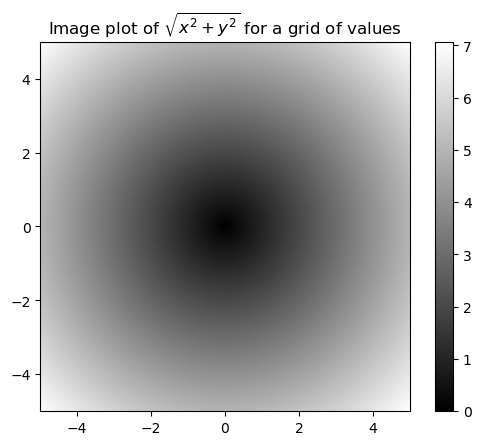

In [157]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

If you're working in IPython, you can close all open plot windows by executing `plt.close("all")`:



In [158]:
plt.close("all")

The term _vectorization_ is used to describe some other computer science concepts, but in this book I use it to describe operations on whole arrays of data at once rather than going value by value using a Python `for` loop.



## Expressing Conditional Logic as Array Operations
The `numpy.where` function is a vectorized version of the ternary expression `x if condition else y`. Suppose we had a Boolean array and two arrays of values:

In [159]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from `xarr` whenever the corresponding value in `cond` is `True`, and otherwise take the value from `yarr`. A list comprehension doing this might look like:



In [160]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

This is very bad. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With `numpy.where` you can do this with a single function call:

In [161]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to `numpy.where` don't need to be arrays; one or both of them can be scalars. A typical use of `where` in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with `numpy.where`:

In [162]:
arr = rng.standard_normal((4, 4))
arr

array([[ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784],
       [-0.85725882,  0.68828179, -1.15452958,  0.65045239]])

In [163]:
arr > 0

array([[ True,  True, False,  True],
       [False,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False,  True]])

In [165]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [-2,  2, -2, -2],
       [ 2, -2,  2, -2],
       [-2,  2, -2,  2]])

You can combine scalars and arrays when using `numpy.where`. For example, I can replace all positive values in `arr` with the constant 2, like so:



In [166]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        , -0.79501746,  2.        ],
       [-1.60270159,  2.        , -1.26162378, -0.07127081],
       [ 2.        , -0.41485376,  2.        , -1.64041784],
       [-0.85725882,  2.        , -1.15452958,  2.        ]])

## Mathematical and Statistical Methods
A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called __reductions__) like `sum`, `mean`, and `std` (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like `numpy.sum`, you have to pass the array you want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some aggregate statistics:


In [168]:
arr = rng.standard_normal((5, 4))
arr

array([[ 0.98087591, -0.11041869,  0.46791853,  0.89060715],
       [ 1.02300937,  0.31238339, -0.06190469, -0.35947965],
       [-0.74864398, -0.96547891,  0.36003466, -0.24455253],
       [-1.99585661, -0.15524762,  1.06383087, -0.27517157],
       [-1.85333593, -0.12434193,  0.78497452,  0.2019986 ]])

In [169]:
arr.mean()

-0.04043995513491838

In [170]:
np.mean(arr)

-0.04043995513491838

In [171]:
arr.sum()

-0.8087991026983676

Functions like `mean` and `sum` take an optional `axis` argument that computes the statistic over the given axis, resulting in an array with one less dimension:



In [172]:
arr.mean(axis=1)

array([ 0.55724573,  0.22850211, -0.39966019, -0.34061123, -0.24767618])

In [173]:
arr.sum(axis=0)

array([-2.59395125, -1.04310375,  2.6148539 ,  0.213402  ])

Here, `arr.mean(axis=1)` means "compute mean across the columns," `where arr.sum(axis=0)` means "compute sum down the rows."

Other methods like `cumsum` and `cumprod` do not aggregate, instead producing an array of the intermediate results:

In [174]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like `cumsum` return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:


In [175]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression `arr.cumsum(axis=0)` computes the cumulative sum along the rows, while `arr.cumsum(axis=1)` computes the sums along the columns:



In [176]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [177]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

## Methods for Boolean Arrays
Boolean values are coerced to 1 (`True`) and 0 (`False`) in the preceding methods. Thus, `sum` is often used as a means of counting `True` values in a Boolean array:



In [180]:
arr = rng.standard_normal(100) # Number of positive values
(arr > 0).sum()

49

In [181]:
(arr <= 0).sum() # Number of non-positive values

51

The parentheses here in the expression `(arr > 0).sum()` are necessary to be able to call `sum()` on the temporary result of `arr > 0`.

Two additional methods, `any` and `all`, are useful especially for Boolean arrays. `any` tests whether one or more values in an array is `True`, while `all` checks if every value is `True`:



In [182]:
bools = np.array([False, False, True, False])

In [183]:
bools.any()

True

In [184]:
bools.all()

False

These methods also work with non-Boolean arrays, where nonzero elements are treated as `True`.

## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in place with the `sort` method:


In [185]:
In [211]: arr = rng.standard_normal(6)
arr

array([-0.01866817, -1.10501888,  0.68289973,  0.91451849, -0.77835212,
       -0.4494232 ])

In [187]:
arr.sort()
arr

array([-1.10501888, -0.77835212, -0.4494232 , -0.01866817,  0.68289973,
        0.91451849])

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to `sort`. In this example data

`arr.sort(axis=0)` sorts the values within each column, while `arr.sort(axis=1)` sorts across each row:



In [188]:
arr = rng.standard_normal((5, 3))
arr

array([[-0.95161863,  0.39107853, -1.60996181],
       [-1.12557525, -0.68462384,  1.22651896],
       [ 2.4024728 ,  0.01995842, -1.23157125],
       [ 0.07418647, -0.86904959,  0.45981957],
       [-1.11370451, -0.36948735, -0.01410553]])

In [190]:
arr.sort(axis=0)
arr

array([[-1.12557525, -0.86904959, -1.60996181],
       [-1.11370451, -0.68462384, -1.23157125],
       [-0.95161863, -0.36948735, -0.01410553],
       [ 0.07418647,  0.01995842,  0.45981957],
       [ 2.4024728 ,  0.39107853,  1.22651896]])

In [191]:
arr.sort(axis=1)
arr

array([[-1.60996181, -1.12557525, -0.86904959],
       [-1.23157125, -1.11370451, -0.68462384],
       [-0.95161863, -0.36948735, -0.01410553],
       [ 0.01995842,  0.07418647,  0.45981957],
       [ 0.39107853,  1.22651896,  2.4024728 ]])

the top-level method `numpy.sort` returns a sorted copy of an array (like the Python built-in function `sorted`) instead of modifying the array in place:

In [192]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

## Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is `numpy.unique` I'm sure at this point this is starting to sound very familiar. Here is something important, __IT SORTS IT FOR YOU__

In [193]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [196]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Contrast `numpy.unique` with the pure Python alternative:



In [197]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list.

Another function, `numpy.in1d`, tests membership of the values in one array in another, returning a Boolean array

- See how it basically scans through each value in `values` and checks to see if it is contained in the `[2, 3, 6]` array?



In [198]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])


Table 4.7: Array set operations

    Method               Description
    unique(x)	         Compute the sorted, unique elements in x
    
    intersect1d(x, y)	 Compute the sorted, common elements in x and y
    
    union1d(x, y)	     Compute the sorted union of elements
    
    in1d(x, y)	         Compute a Boolean array indicating whether each element of x is contained in y
    
    setdiff1d(x, y)	     Set difference, elements in x that are not in y
    
    setxor1d(x, y)	     Set symmetric differences; elements that are in either of the arrays, but not both

# File Input and Output with Arrays
NumPy is able to save and load data to and from disk in some text or binary formats. In this section I discuss only NumPy's built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data (see Ch 6: Data Loading, Storage, and File Formats for much more).

`numpy.save` and `numpy.load` are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:



In [199]:
arr = np.arange(10)
np.save("some_array", arr)

If the file path does not already end in _.npy_, the extension will be appended. The array on disk can then be loaded with `numpy.load`:



In [200]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using `numpy.savez` and passing the arrays as keyword arguments:



In [201]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an _.npz_ file, you get back a dictionary-like object that loads the individual arrays lazily:



In [203]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use `numpy.savez_compressed` instead:



In [204]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

# Linear Algebra
Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. Multiplying two two-dimensional arrays with `*` is an element-wise product, while matrix multiplications require either using the `dot` function or the `@` infix operator. `dot` is both an array method and a function in the `numpy` namespace for doing matrix multiplication:

In [205]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [206]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [207]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [208]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`x.dot(y)` is equivalent to `np.dot(x, y)`:



In [209]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:



In [210]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg` has a standard set of matrix decompositions and things like inverse and determinant:



In [211]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)

array([[ 0.47497294, -0.0261189 ,  0.2321966 ,  0.20356613,  0.42130576],
       [-0.0261189 ,  0.36711217,  0.24361171, -0.00268357, -0.03778258],
       [ 0.2321966 ,  0.24361171,  0.75913583,  0.54716505,  0.47611673],
       [ 0.20356613, -0.00268357,  0.54716505,  0.80796693,  0.4859876 ],
       [ 0.42130576, -0.03778258,  0.47611673,  0.4859876 ,  0.72716159]])

In [212]:
mat @ inv(mat)

array([[ 1.00000000e+00,  0.00000000e+00,  2.22044605e-16,
         0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  1.00000000e+00,  1.11022302e-15,
         4.44089210e-16,  4.44089210e-16],
       [ 0.00000000e+00,  2.77555756e-17,  1.00000000e+00,
        -2.22044605e-16, -4.44089210e-16],
       [ 0.00000000e+00, -3.46944695e-18,  3.33066907e-16,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.38777878e-16,  0.00000000e+00,
        -4.44089210e-16,  1.00000000e+00]])

The expression `X.T.dot(X)` computes the dot product of `X` with its transpose `X.T`.


Table 4.8: Commonly used numpy.linalg functions
    
    Function	Description

    diag		Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array  into a square matrix with zeros on the off-diagonal

    dot			Matrix multiplication

    trace		Compute the sum of the diagonal elements

    det			Compute the matrix determinant

    eig			Compute the eigenvalues and eigenvectors of a square matrix

    inv			Compute the inverse of a square matrix
    
    pinv		Compute the Moore-Penrose pseudoinverse of a matrix

    qr			Compute the QR decomposition

    svd			Compute the singular value decomposition (SVD)

    solve		Solve the linear system Ax = b for x, where A is a square matrix

    lstsq		Compute the least-squares solution to Ax = b


# Example: Random Walks

The simulation of ___random walks___ provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in `random` module:



In [214]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


Now make a plot of the first 100 values on one of these random walks:

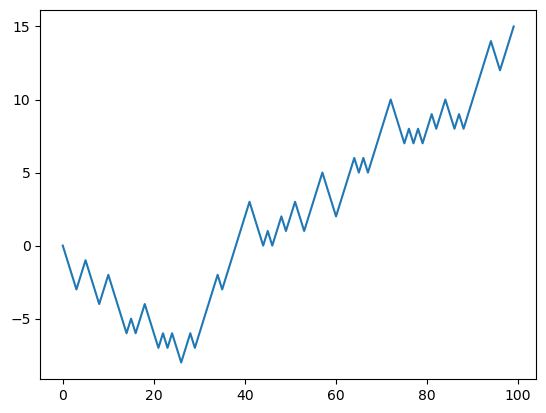

In [215]:
plt.plot(walk[:100])

You might make the observation that `walk` is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the `numpy.random` module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [216]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:


In [217]:
walk.min()

-8

In [218]:
walk.max()

50

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using `argmax`, which returns the first index of the maximum value in the Boolean array (`True` is the maximum value):



In [219]:
(np.abs(walk) >= 10).argmax()

155

Note that using `argmax` here is not always efficient because it always makes a full scan of the array. In this special case, once a `True` is observed we know it to be the maximum value.



## Simulating Many Random Walks at Once
If your goal was to simulate many random walks, say five thousand of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the `numpy.random` functions will generate a two-dimensional array of draws, and we can compute the cumulative sum for each row to compute all five thousand random walks in one shot:



In [220]:
nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1

steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(axis=1)

walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [221]:
walks.max()

114

In [222]:
walks.min()

-120

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the `any` method:



In [223]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

hits30

array([False,  True,  True, ...,  True, False,  True])

In [224]:
hits30.sum()

3395

We can use this Boolean array to select the rows of `walks` that actually cross the absolute 30 level, and call `argmax` across axis 1 to get the crossing times:



In [225]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

crossing_times

array([201, 491, 283, ..., 219, 259, 541])

Now to compute the average minimum crossing times:

In [226]:
crossing_times.mean()

500.5699558173785

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like `standard_normal` to generate normally distributed steps with some mean and standard deviation:



In [227]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

In [228]:
draws

array([[-0.04049737, -0.72203015, -0.25774138, ...,  0.42355751,
        -0.67303006, -0.41968018],
       [-0.04384188, -0.35375729,  0.27860676, ...,  0.01100176,
        -0.00527772, -0.08297507],
       [ 0.35227417, -0.35383118,  0.09818312, ..., -0.02725589,
        -0.04007853, -0.09849703],
       ...,
       [ 0.22455202, -0.12520673, -0.02435565, ..., -0.19437209,
        -0.20666754,  0.16508676],
       [-0.04544783,  0.2540093 , -0.298138  , ...,  0.467853  ,
         0.03529931, -0.18926481],
       [-0.10790612, -0.11282332, -0.05788132, ...,  0.11783678,
        -0.03052947,  0.18259634]])

Keep in mind that this vectorized approach requires creating an array with `nwalks * nsteps` elements, which may use a large amount of memory for large simulations. If memory is more constrained, then a different approach will be required.

